In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import os

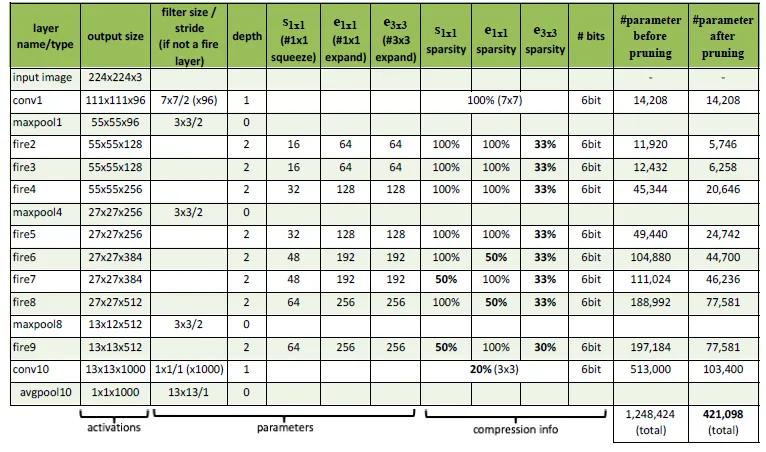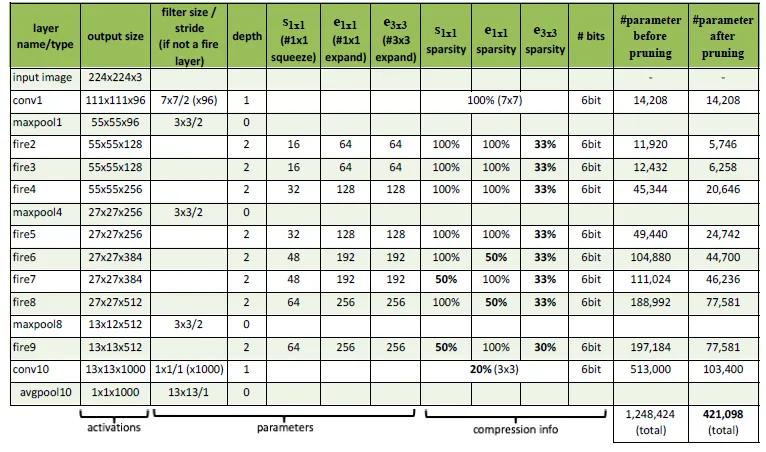

In [15]:

def squeezenet(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)

    
    def fire_module(x, squeeze, expand):
        squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x)
        expanded1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed)
        expanded3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeezed)
        return concatenate([expanded1x1, expanded3x3], axis=-1)


    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='valid')(input_tensor)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=64, expand=256)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output_tensor = Activation('softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)

    return model

In [16]:
# SqueezeNet Simple tasarımı
def squeezenet_simple(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)

    def fire_module(x, squeeze, expand):
        squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x) # Veryi 1x1 lik filterden geçirr
        expanded1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed) # Ağın daha derin öğrenmesi için squeeze adımında küçültülen veriyi büyütür
        return expanded1x1

    # SqueezeNet Simple mimarisi
    # İlk Adım
    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='valid')(input_tensor)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=48, expand=192)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=48, expand=192)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output_tensor = Activation('softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)

    return model



In [17]:
# SqueezeNet Complex tasarımı
def squeezenet_complex(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)

    # Fire modülleri
    def fire_module(x, squeeze, expand):
        squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x)
        expanded1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed)
        expanded3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeezed)
        return concatenate([expanded1x1, expanded3x3], axis=-1)

    # SqueezeNet Complex mimarisi
    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='valid')(input_tensor)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = fire_module(x, squeeze=64, expand=256)
    x = fire_module(x, squeeze=80, expand=320)
    x = fire_module(x, squeeze=80, expand=320)
    x = fire_module(x, squeeze=96, expand=384)
    x = fire_module(x, squeeze=96, expand=384)
    x = fire_module(x, squeeze=112, expand=448)
    x = fire_module(x, squeeze=112, expand=448)
    x = fire_module(x, squeeze=128, expand=512)
    x = fire_module(x, squeeze=128, expand=512)
    x = fire_module(x, squeeze=144, expand=576)
    x = fire_module(x, squeeze=144, expand=576)
    x = fire_module(x, squeeze=160, expand=640)
    x = fire_module(x, squeeze=160, expand=640)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output_tensor = Activation('softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)

    return model

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images_for_cnn(training_directory, batch_size=32, target_size=(224, 224), keyword="Grape"):
    data_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = data_generator.flow_from_directory(
        training_directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        classes=[dir for dir in os.listdir(training_directory) if keyword in dir]
    )

    validation_generator = data_generator.flow_from_directory(
        training_directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        classes=[dir for dir in os.listdir(training_directory) if keyword in dir]
    )

    return train_generator, validation_generator


In [19]:
train_generator, validation_generator = load_images_for_cnn('/kaggle/input/plantvillage-dataset/color', batch_size=32, target_size=(224, 224), keyword="Grape")

Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.


In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime


model = squeezenet_simple(input_shape=(224, 224, 3), num_classes=4)


model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# TensorBoard için log dosyasının ismini belirle
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Modeli Eğit
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[tensorboard_callback]
)



Epoch 1/10
102/102 [==============================] - 125s 1s/step - loss: 1.3580 - accuracy: 0.3405 - val_loss: 1.3080 - val_accuracy: 0.3403
Epoch 2/10
102/102 [==============================] - 120s 1s/step - loss: 1.2322 - accuracy: 0.4574 - val_loss: 1.1560 - val_accuracy: 0.5413
Epoch 3/10
102/102 [==============================] - 121s 1s/step - loss: 1.0450 - accuracy: 0.5506 - val_loss: 0.8519 - val_accuracy: 0.6436
Epoch 4/10
102/102 [==============================] - 120s 1s/step - loss: 0.8610 - accuracy: 0.6293 - val_loss: 0.7440 - val_accuracy: 0.6806
Epoch 5/10
102/102 [==============================] - 119s 1s/step - loss: 0.7692 - accuracy: 0.6733 - val_loss: 0.7073 - val_accuracy: 0.6720
Epoch 6/10
102/102 [==============================] - 113s 1s/step - loss: 0.6790 - accuracy: 0.7392 - val_loss: 0.6205 - val_accuracy: 0.7571
Epoch 7/10
102/102 [==============================] - 119s 1s/step - loss: 0.6110 - accuracy: 0.7773 - val_loss: 0.5996 - val_accuracy: 0.7731

In [26]:
import matplotlib.pyplot as plt

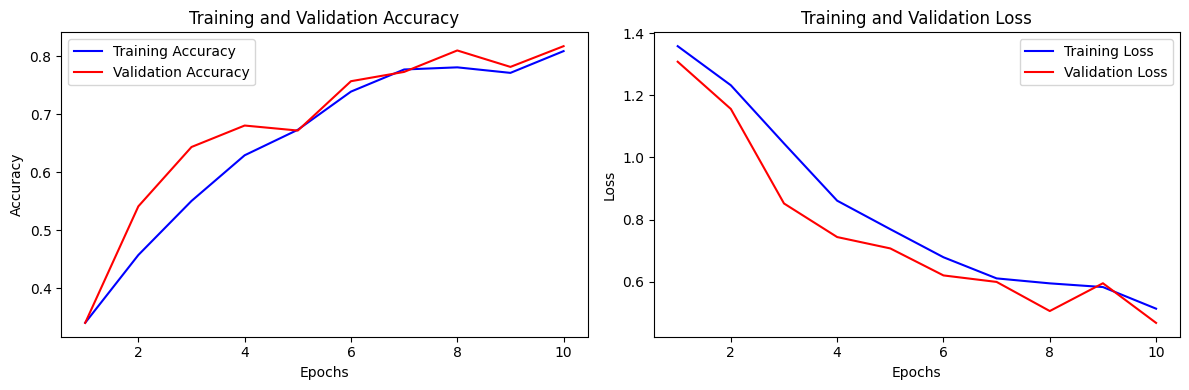

In [27]:
#Görselleştirme
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_100 (Conv2D)         (None, 109, 109, 96)         14208     ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 96)           0         ['conv2d_100[0][0]']          
 g2D)                                                                                             
                                                                                                  
 conv2d_101 (Conv2D)         (None, 54, 54, 16)           1552      ['max_pooling2d_9[0][0]'

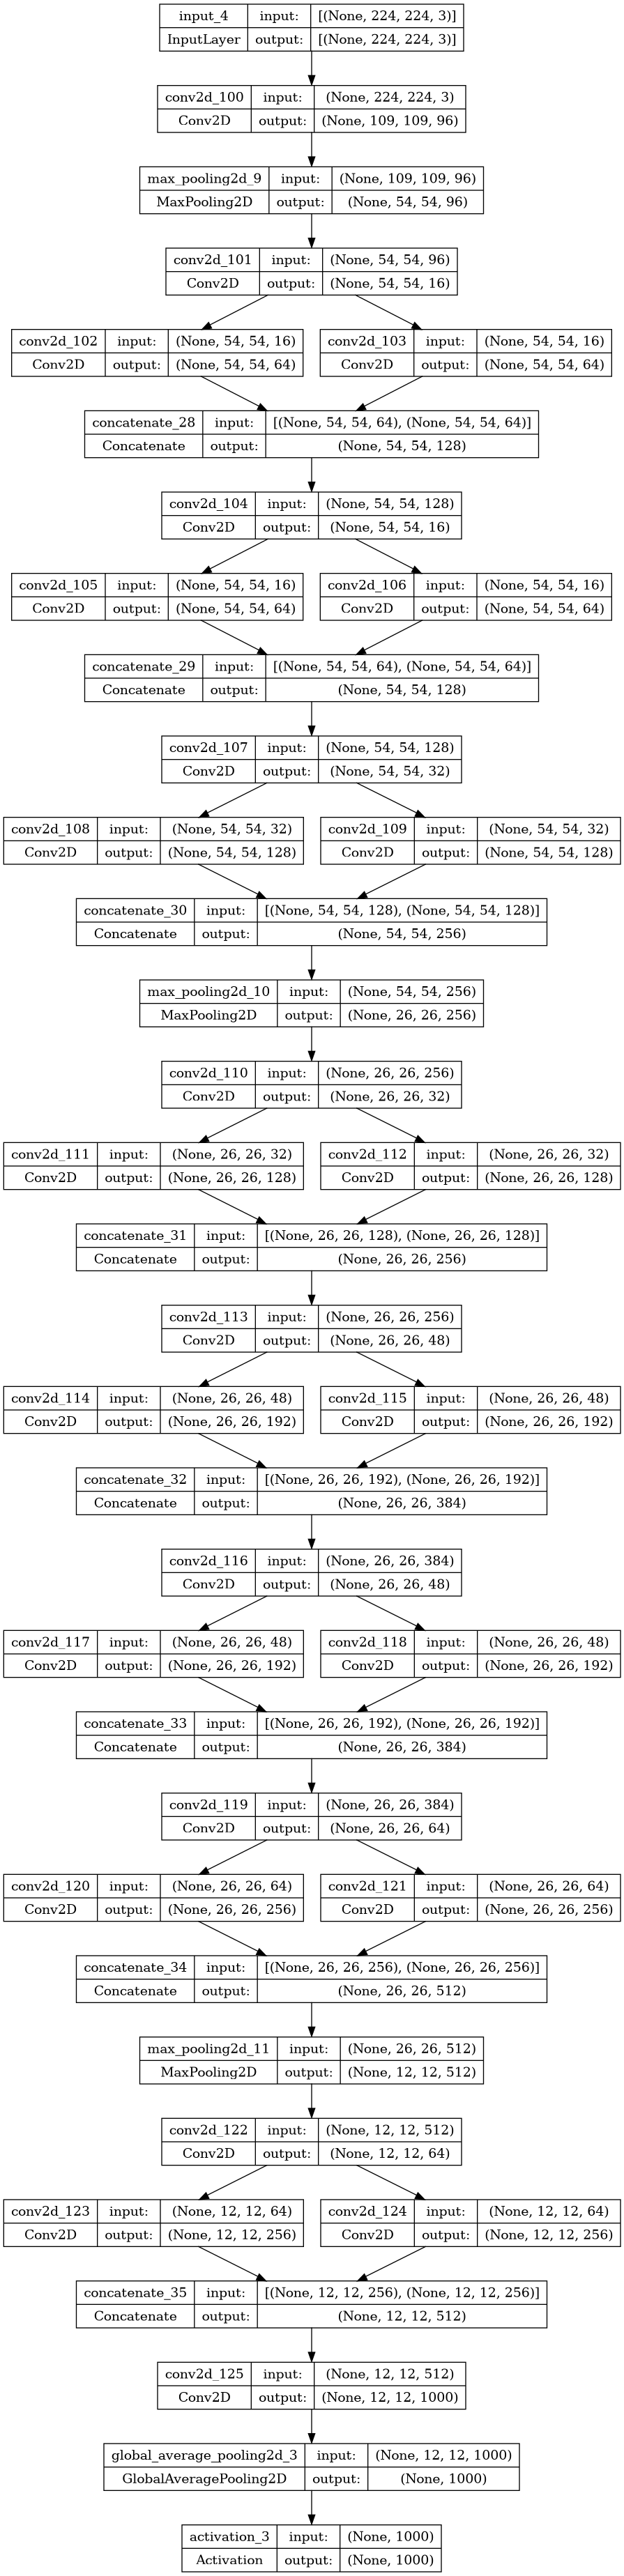

In [9]:


squeezenet_model = squeezenet()
squeezenet_simple_model = squeezenet_simple()
squeezenet_complex_model = squeezenet_complex()

squeezenet_model.summary()
squeezenet_simple_model.summary()
squeezenet_complex_model.summary()


plot_model(squeezenet_model, to_file='squeezenet_model.png', show_shapes=True, show_layer_names=True)
#plot_model(squeezenet_simple_model, to_file='squeezenet_simple_model.png', show_shapes=True, show_layer_names=True)
#plot_model(squeezenet_complex_model, to_file='squeezenet_complex_model.png', show_shapes=True, show_layer_names=True)
